<a href="https://colab.research.google.com/github/OksanaSPb78/Python_Seminars/blob/main/Python_Sem_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Разбор домашнего задания
Задача 40:

Работать с файлом california_housing_train.csv, который находится в папке sample_data**.* Определить среднюю стоимость дома, где кол-во людей от 0 до 500 (population)*


In [4]:


import pandas as pd
df = pd.read_csv('sample_data/california_housing_train.csv')
df[(df['population'] > 0) & (df['population'] < 500)]['median_house_value'].mean()  # Средняя стоимость дома, где количество людей от 0 до 500

206683.83635227982

Задача 42:

Узнать какая максимальная households в зоне минимального значения population

In [ ]:
df[df['population'] == df['population'].min()]['households'].max()  # Узнать какая максимальная households в зоне минимального значения population


4.0

Задача 63:

In [7]:
# импортируем из библиотек
import pandas as pd
import seaborn as sns


In [8]:
# создаем dataFrame и выводим первые 5 строк
df = pd.read_csv('sample_data/california_housing_test.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


1 Изобразите отношение households к population с помощью точечного графика

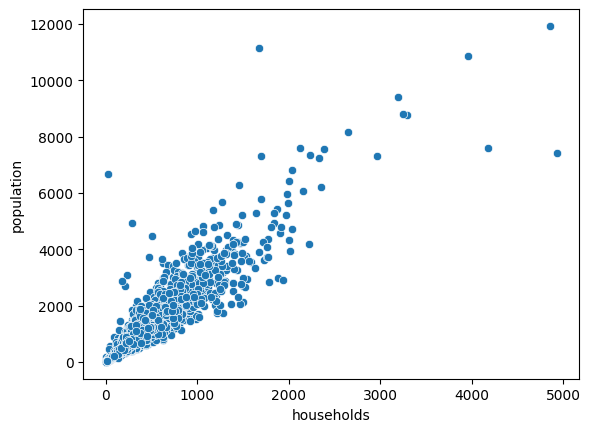

In [ ]:
# строим график с помощью метода scatterplot,которы принимает 3 параметра (data-весь dataFrame; объекты по оси Х; объекты по оси y)
sns.scatterplot(data = df, x = 'households', y = 'population');

2 Визуализировать longitude по отношения к median_house_value, используя линейный график

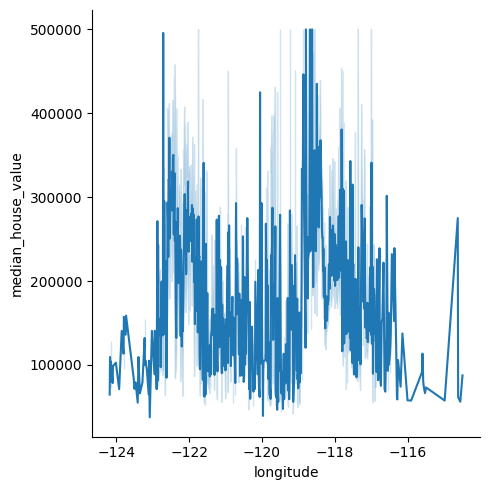

In [ ]:
# визуализация данных через линейный график методом relplot()
# параметры: 1-указать данные, 2-по какому типу построение графика, 3- ось х, 4- ось y
sns.relplot(data = df, kind='line', x ='longitude', y = 'median_house_value');

3 Представить гистограмму по housing_median_age

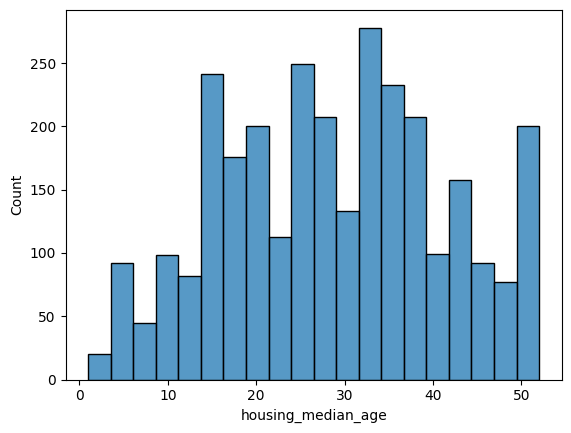

In [ ]:
# гистограмма выводится методом histplot(), где указываются параметры: данные, переменная х(т.к. в задании по одному признаку)
sns.histplot(data = df, x ='housing_median_age');

4 Изобразить гистограмму по median_house_value с оттенком housing_median_age

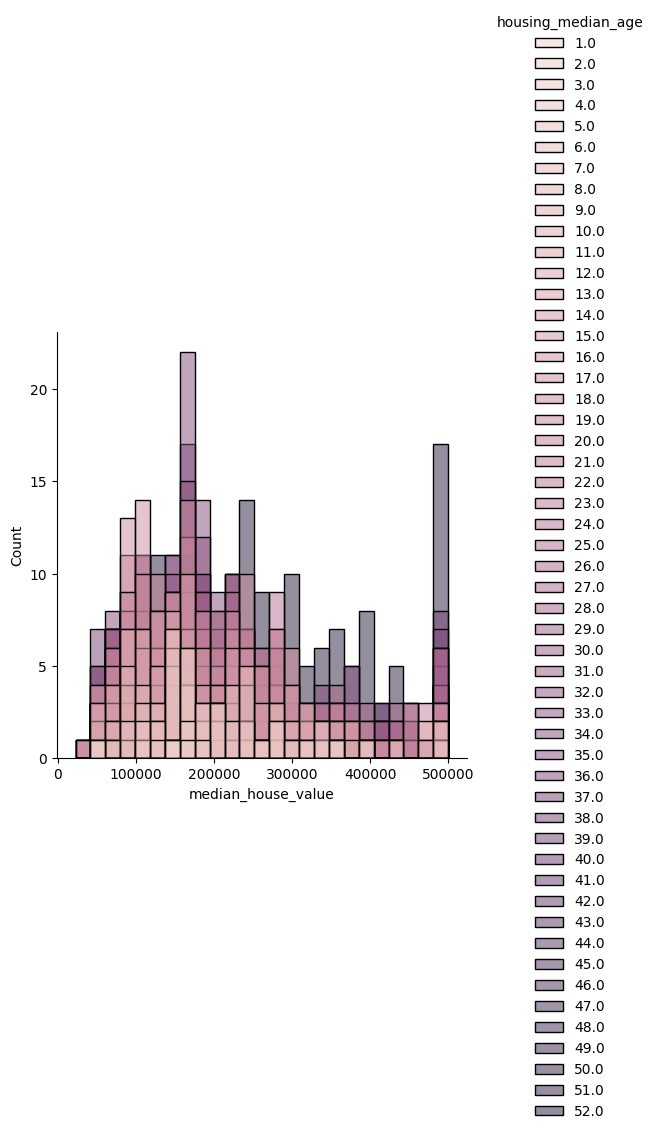

In [ ]:
# метод displot построения гистограммы с параметром оттенка hue=''
sns.displot(data =  df, x ='median_house_value', hue= 'housing_median_age'); 

Задача 65:

Написать EDA для датасета про пингвинов

Необходимо:

1. Использовать 2-3 точечных графика
2. Применить доп измерение в точечных графиках, используя аргументы hue, size, stile
3. Использовать PairGrid с типом графика на ваш выбор
4. Использовать 2-3 гистограммы

In [9]:
# напишем новую df и считаем данные методом load_dataset()
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


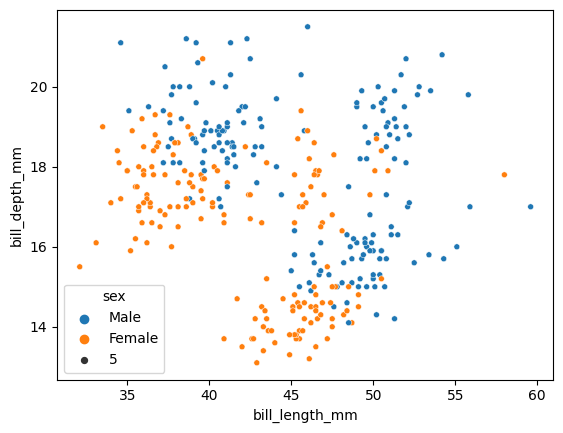

In [15]:
# строим точечные графики 2-3 шт:
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='sex', size=5);


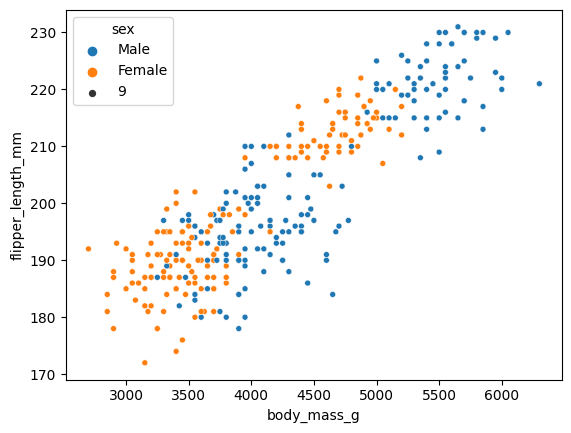

In [16]:
sns.scatterplot(data=df, x='body_mass_g', y='flipper_length_mm', hue='sex', size=9);


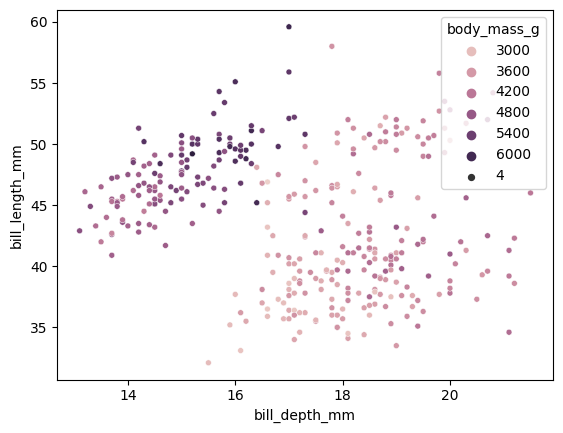

In [17]:
sns.scatterplot(data=df, x='bill_depth_mm', y='bill_length_mm', hue='body_mass_g', size=4);

4. Использовать PairGrid с типом графика на ваш выбор

In [18]:
# создаем список с необходимыми признаками для сетки графиков PairGrip
lst = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex']

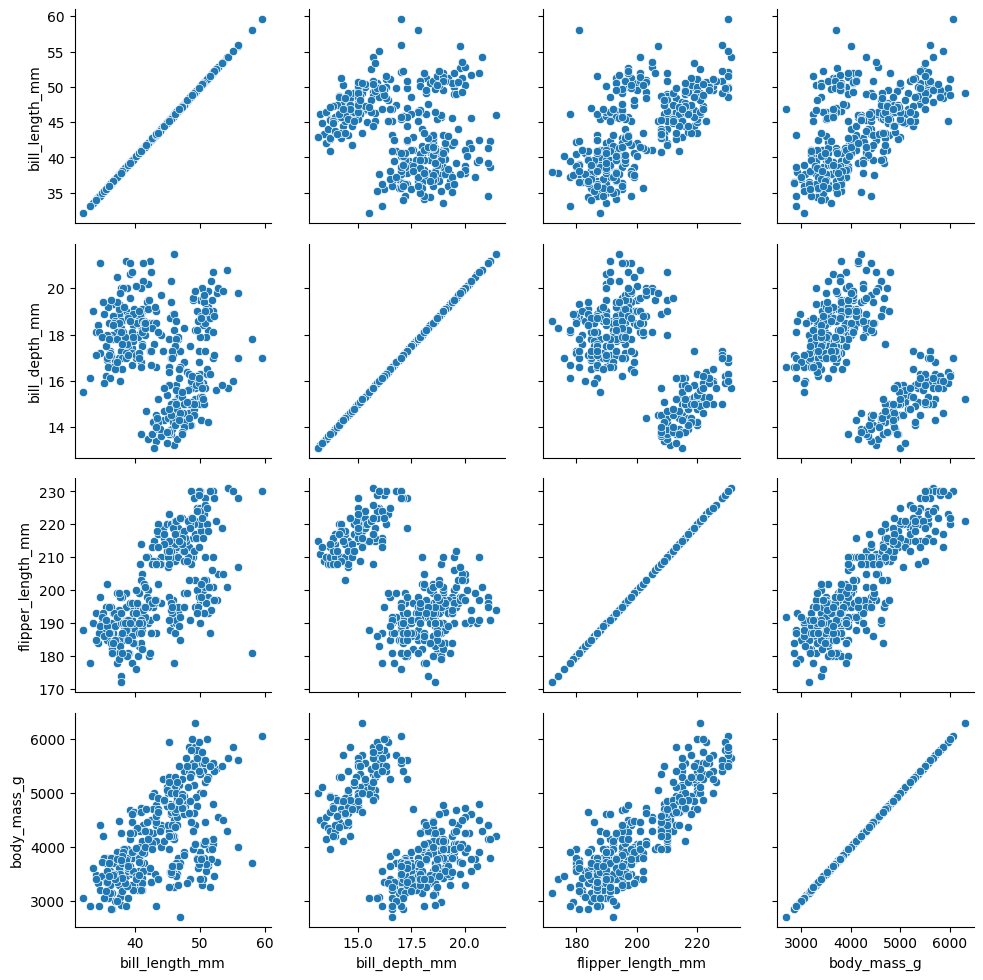

In [21]:
# с помощью библиотеки seaborn создаем PairGrid
g = sns.PairGrid(df[lst])
# создаем карту
g.map(sns.scatterplot);


4. Использовать 2-3 гистограммы

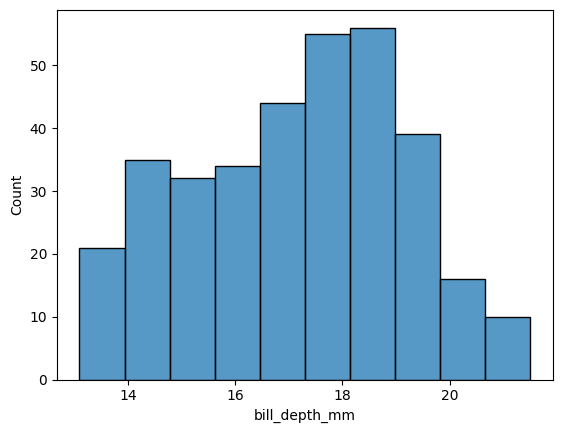

In [23]:
sns.histplot(data=df,x='bill_depth_mm');

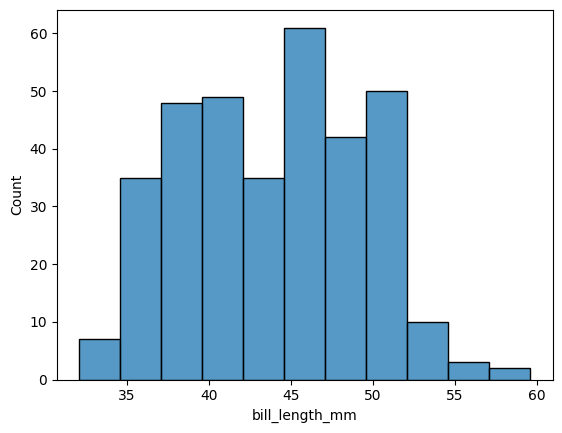

In [24]:
sns.histplot(data=df,x='bill_length_mm');


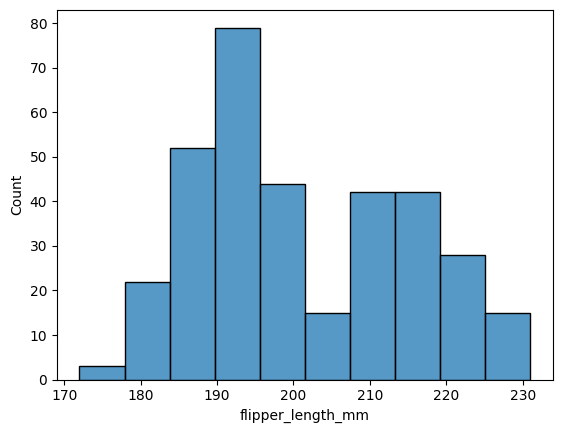

In [25]:
sns.histplot(data=df,x='flipper_length_mm');

Создать *HEAtMAP*

In [28]:
import numpy

<ipython-input-29-fd32f8fe7941>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


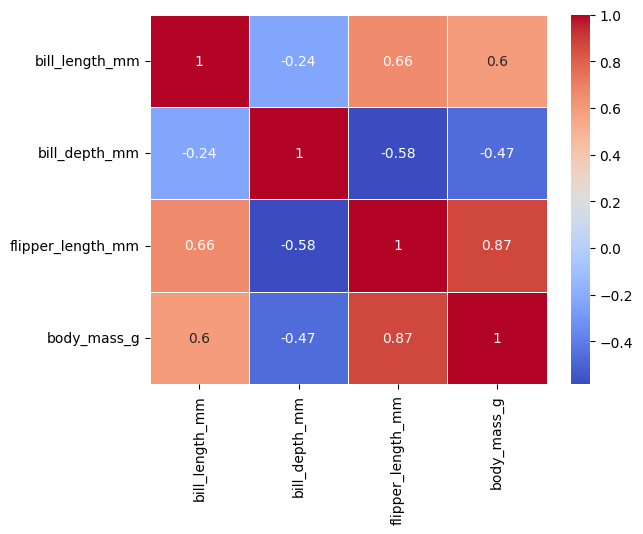

In [29]:
# heatmap создается при помощи матрица кореляций
corr_matrix = df.corr()
sns.heatmap(corr_matrix, linewidths=0.5, cmap='coolwarm', annot= True);

Задача 67:
1. Создать новый столбец в таблице с пингвинами, который будет отвечать за показатель длины клюва пингвина. 
high - высокий(от 42), middle - средний(от 35 до 42), low - низкий(до 35).

In [31]:
# с помощью метода loc() фильтруем данные по каждому параметру клюва. Если параметр подходит, то записываем его
df.loc[df['bill_length_mm'] >= 42, 'height_group'] = 'high'
df.loc[(df['bill_length_mm'] >= 35) & (df['bill_length_mm'] < 42), 'height_group'] = 'middle'
df.loc[df['bill_length_mm'] < 35, 'height_group'] = 'low'
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,height_group
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,middle
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,middle
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,middle
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,middle


In [34]:
# посмотрим все значения, которые использовались с помощью .value_counts()
df.loc[df['bill_length_mm'] >= 42, 'height_group'] = 'high'
df.loc[(df['bill_length_mm'] >= 35) & (df['bill_length_mm'] < 42), 'height_group'] = 'middle'
df.loc[df['bill_length_mm'] < 35, 'height_group'] = 'low'
df['height_group'].value_counts()

high      206
middle    127
low         9
Name: height_group, dtype: int64

Задача 69:
Изобразить гистограмму по flipper_length_mm с оттенком height_group. Сделать анализ

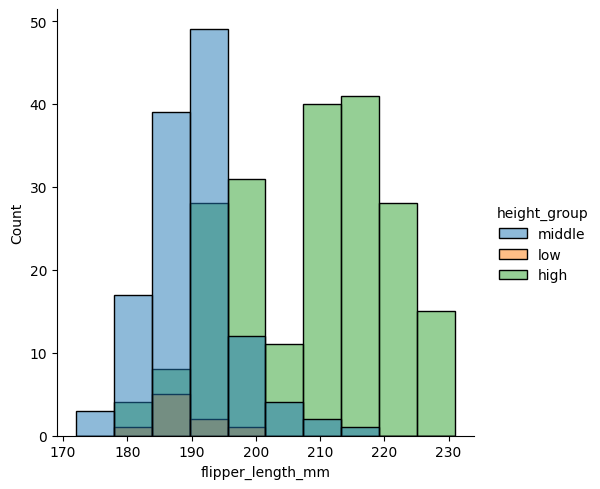

In [36]:
# для оттенка используем метод dispot()
sns.displot(df, x='flipper_length_mm', hue='height_group');

Круговая диаграмма

In [42]:
# скомпоновать данные
x = df['height_group'].value_counts()
x

high      206
middle    127
low         9
Name: height_group, dtype: int64

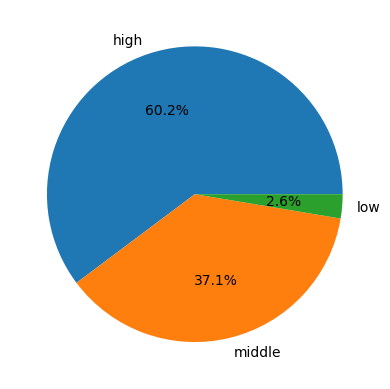

In [41]:
import matplotlib.pyplot as plt
plt.pie(x.values, labels=x.index, autopct='%.1f%%');